In [ ]:
# TCC: O Potencial da Inteligência Artificial na Gestão de Negócios e Projetos:
#      Um Estudo sobre o ChatGPT como Ferramenta de Apoio à Análise de Dados e Tomada de Decisão.
#
# Aluno: Carlos Fernando Rosário Sinésio


Código com a conexão API ao Openai para o ChatGpt

In [ ]:
pip install -q openai

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.5/76.5 kB 1.3 MB/s eta 0:00:00


In [ ]:
#Importando bibliotecas
from pathlib import Path
import pandas as pd
import openai
import datetime
import matplotlib.pyplot as plt

In [ ]:
credential = {
     'token': '<token>'
     }

In [ ]:
# Importando o token da API do OpenAI
openai.api_key = credential.get('token')

In [ ]:
def obter_resposta_gpt(prompt):
    response = openai.Completion.create(
        engine='text-davinci-003',
        prompt=prompt,
        max_tokens=900,
        n=1,
        stop=None,
        temperature=0.7,
        top_p=1,
        frequency_penalty=0,
        presence_penalty=0
    )
    return response.choices[0].text.strip()

In [ ]:
#Função para perguntar ao ChatGpt com uma série de dados
def perguntar_chagpt(dados, pergunta):
    prompt = f"Com o resultado desses dados: {dados} , {pergunta}"
    resposta_gpt = obter_resposta_gpt(prompt)
    return resposta_gpt

In [ ]:
#Função para perguntar ao ChatGpt com duas séries de dados diferentes
def perguntar_chagpt2(dados1, dados2, pergunta):
    prompt = f"Com o resultado desses dados: {dados1}, {dados2} , {pergunta}"
    resposta_gpt = obter_resposta_gpt(prompt)
    return resposta_gpt

01 - Indicadores de Bugs

In [ ]:
%%time
# Importando de um repositório no github com os dados dos Indicadores de Bugs
data = pd.read_csv('https://raw.githubusercontent.com/Fernandosinesio/TCC-Fernando_Sinesio/main/data/bugs.csv', header=0)
data.head(30)

CPU times: user 15.4 ms, sys: 0 ns, total: 15.4 ms
Wall time: 129 ms


,tipo,total,ano
0,impeditivos_fechados,263,2022
1,impeditivos_abertos,263,2022
2,fechados,430,2022
3,abertos,433,2022
4,fechados,478,2021
5,abertos,489,2021
6,impeditivos_fechados,264,2021
7,impeditivos_abertos,264,2021
8,abertos,494,2020
9,fechados,489,2020


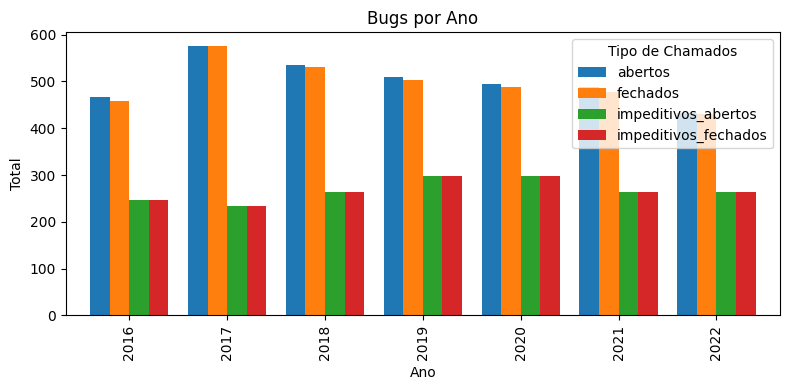

In [ ]:
#Ilustração gráfica dos dados

grouped_data = data.pivot(index='ano', columns='tipo', values='total')

grouped_data.plot(kind='bar', width=0.8, figsize=(8, 4))

plt.xlabel('Ano')
plt.ylabel('Total')
plt.title('Bugs por Ano')
plt.legend(title='Tipo de Chamados')

plt.tight_layout()
plt.show()

In [ ]:
print('')
pergunta = "Interprete, de maneira resumida, esses resultados ano a ano em forma de tendência,\
            identificando tendências e oscilações,\
            contextualizando e embasando a tomada de decisão,\
            sugerindo ao final uma análise técnica auxiliando na tomada de decisão,\
            quebre em parágrafos"

resposta_gpt = perguntar_chagpt(data,pergunta)
print("Resposta do ChatGpt:")
print(f"{resposta_gpt}")


Resposta do ChatGpt:
para melhor compreensão da leitura.

Em 2022, houve uma estabilidade entre os impeditivos fechados e abertos, com 263 para cada. Já em 2021, houve um aumento significativo na quantidade de impeditivos abertos, com 489 em comparação aos 478 fechados. Em 2020, houve um aumento nos impeditivos abertos, com 494, e uma leve queda nos impeditivos fechados, com 489.

Em 2019, houve um aumento significativo na quantidade de impeditivos abertos, com 509, e uma leve queda nos impeditivos fechados, com 502. Em 2018, houve um aumento na quantidade de impeditivos abertos com 534 e também uma leve queda nos impeditivos fechados com 531.

Em 2017, houve um aumento na quantidade de impeditivos abertos com 576 e uma leve queda nos impeditivos fechados com 575. Em 2016, houve um aumento significativo na quantidade de impeditivos abertos, com 467, e uma leve queda nos impeditivos fechados, com 458.

De maneira geral, houve uma tendência de crescimento nos impeditivos abertos, enquan

02 - Desempenho do Time

In [ ]:
%%time
# Importando de um repositório no github com os dados com o Desempenho do Time
data = pd.read_csv('https://raw.githubusercontent.com/Fernandosinesio/TCC-Fernando_Sinesio/main/data/desempenho_time.csv', header=0)
data.head(30)

CPU times: user 13.4 ms, sys: 847 µs, total: 14.3 ms
Wall time: 343 ms


,ano,desempenho,valor
0,2018,Meta,280
1,2018,Realizado,141
2,2019,Meta,560
3,2019,Realizado,523
4,2020,Meta,550
5,2020,Realizado,480
6,2021,Meta,550
7,2021,Realizado,510
8,2022,Meta,560
9,2022,Realizado,525


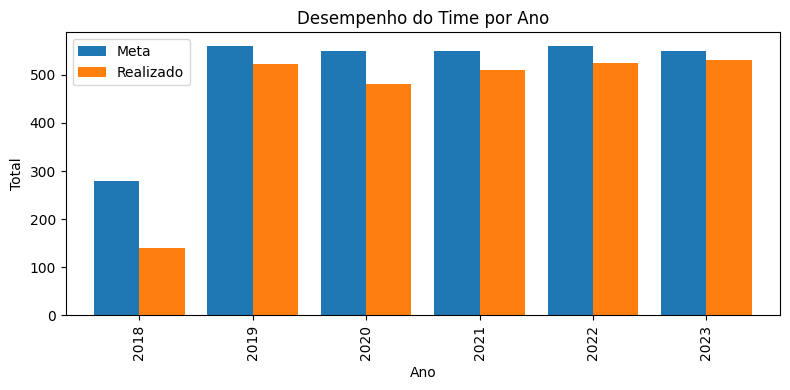

In [ ]:
#Ilustração gráfica dos dados

grouped_data = data.pivot(index='ano', columns='desempenho', values='valor')

grouped_data.plot(kind='bar', width=0.8, figsize=(8, 4))

plt.xlabel('Ano')
plt.ylabel('Total')
plt.title('Desempenho do Time por Ano')
plt.legend(title='')

plt.tight_layout()
plt.show()

In [ ]:
print('')
pergunta = "Interprete esses resultados ano a ano em forma de tendência,\
            identificando tendências e oscilações,\
            contextualizando e embasando a tomada de decisão,\
            sugerindo ao final uma análise técnica auxiliando na tomada de decisão."

resposta_gpt = perguntar_chagpt(data,pergunta)
print("Resposta do ChatGpt:")
print(f"{resposta_gpt}")


Resposta do ChatGpt:
Analisando o desempenho dos anos de 2018 a 2023, pode-se perceber que houve um crescimento constante no valor realizado ao longo dos anos, mas o crescimento foi mais acentuado entre 2019 e 2021. Em 2018, o valor realizado foi de 141, abaixo da meta estabelecida de 280. Em 2019, o valor realizado aumentou para 523, com metas estabelecidas em 560, o que significa que houve um crescimento de mais de 300%. Em 2020, o valor realizado foi de 480, bem próximo à meta de 550. Em 2021, o valor realizado aumentou para 510, com metas estabelecidas em 550. Em 2022, o valor realizado foi de 525, superando a meta de 560. Por fim, em 2023, o valor realizado foi de 530, superando a meta de 550.

Portanto, podemos concluir que houve um crescimento constante no desempenho ao longo dos anos, com as metas sendo superadas desde 2022. Em termos de análise técnica, as metas e os valores realizados devem ser observados para identificar os principais fatores que estão influenciando esse cr

03 - Mortalidade Infantil

In [ ]:
%%time
# Importando de um repositório no github com os dados dos Indicadores de Mortalidade Infantil
data1 = pd.read_csv('https://raw.githubusercontent.com/Fernandosinesio/TCC-Fernando_Sinesio/main/data/mortalidade_infantil.csv', header=0)
data.head(30)

CPU times: user 12.4 ms, sys: 2.06 ms, total: 14.5 ms
Wall time: 336 ms


,mortalidade_infantil,mes,ano
0,137,janeiro,2022
1,133,fevereiro,2022
2,133,março,2022
3,131,abril,2022
4,134,maio,2022
5,129,junho,2022
6,127,julho,2022
7,107,agosto,2022
8,120,setembro,2022
9,125,outubro,2022


In [ ]:
#Ilustração gráfica dos dados
import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(_df_0, *['mortalidade_infantil'], **{})
chart

In [ ]:
%%time
# Importando de um repositório no github com os dados dos Projetos Prioritários
data2 = pd.read_csv('https://raw.githubusercontent.com/Fernandosinesio/TCC-Fernando_Sinesio/main/data/projetos_prioritarios.csv', header=0)
data2.head(30)

CPU times: user 21.5 ms, sys: 0 ns, total: 21.5 ms
Wall time: 352 ms


,projetos,descricao,iniciado_em,concluido_em
0,Programa Cisternas,"Instalação de sisternas de cisternas, em área ...",07/03/2022,31/10/2022
1,Construção do Hospital Materno Infantil,construção do Hospital Materno Infantil com 13...,20/05/2021,02/08/2022
2,Inaguração de hospital Materno Infantil,Início do funcionamento do Hospital Materno In...,08/08/2022,08/08/2022
3,Campanha de vacinação Infantil,Tem o objetivo em imunizar 15 mil pessoas da ...,06/03/2022,27/11/2022
4,Obras de Saneamento Básico,Obras de criação e reestruração para Tratament...,03/01/2022,30/09/2022
5,Programa de Segurança Pública,Programa de apoio à política de segurança públ...,01/02/2022,23/09/2022


In [ ]:
print('')
pergunta = "Interprete esses resultados correlacionando os projetos sociais com a taxa de mortalidade infantil,\
            identificando tendências e oscilações mensais,\
            identificando qual projeto foi relevante para aquele número a taxa de mortalidade infantil."

resposta_gpt = perguntar_chagpt2(data1,data2,pergunta)
print("Resposta do ChatGpt:")
print(f"{resposta_gpt}")


Resposta do ChatGpt:
mensal de mortalidade infantil.

A tendência dos dados de mortalidade infantil é de manter-se estável ao longo dos meses, variando entre 127 e 137. Isso mostra que, mesmo com os projetos sociais implementados, a mortalidade infantil ainda é um problema comum. 

Os projetos sociais e sua relação com a mortalidade infantil podem ser vistos a partir dos números específicos de cada mês. Por exemplo, o Programa de Cisternas, que foi iniciado em março, ajudou a reduzir a mortalidade infantil para 133, o que mostra que a implementação deste projeto foi relevante para o índice de mortalidade infantil. Da mesma forma, a Construção do Hospital Materno Infantil, iniciada em maio de 2021, contribuiu para a redução da mortalidade infantil para 134. A Campanha de Vacinação Infantil, iniciada em março de 2022, também foi relevante para a redução da mortalidade infantil para 131. Além disso, os projetos de Saneamento Básico e Segurança Pública também contribuíram para a redução d